**Week 10 Independent Lab**

# Decision Trees

Author: Magdalena Gerharter  
Course: BGEN 632 Grad. Intro. to Python  
Term: Spring 2025

## Import Modules

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder

## Set Working directory and load data

In [8]:
os.chdir("/Users/magdalenagerharter/Documents/GitHub/week10labs/data")
os.getcwd()

hospital_data = pd.read_csv("calihospital.txt", delimiter = "\t")
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

`Operation Income`= integer  
`Operation Revenue`= integer  
`TypeControl`= object  
`DonorType`= object

## Regression and Classification Trees

### Regression Tree - `Operating Income`

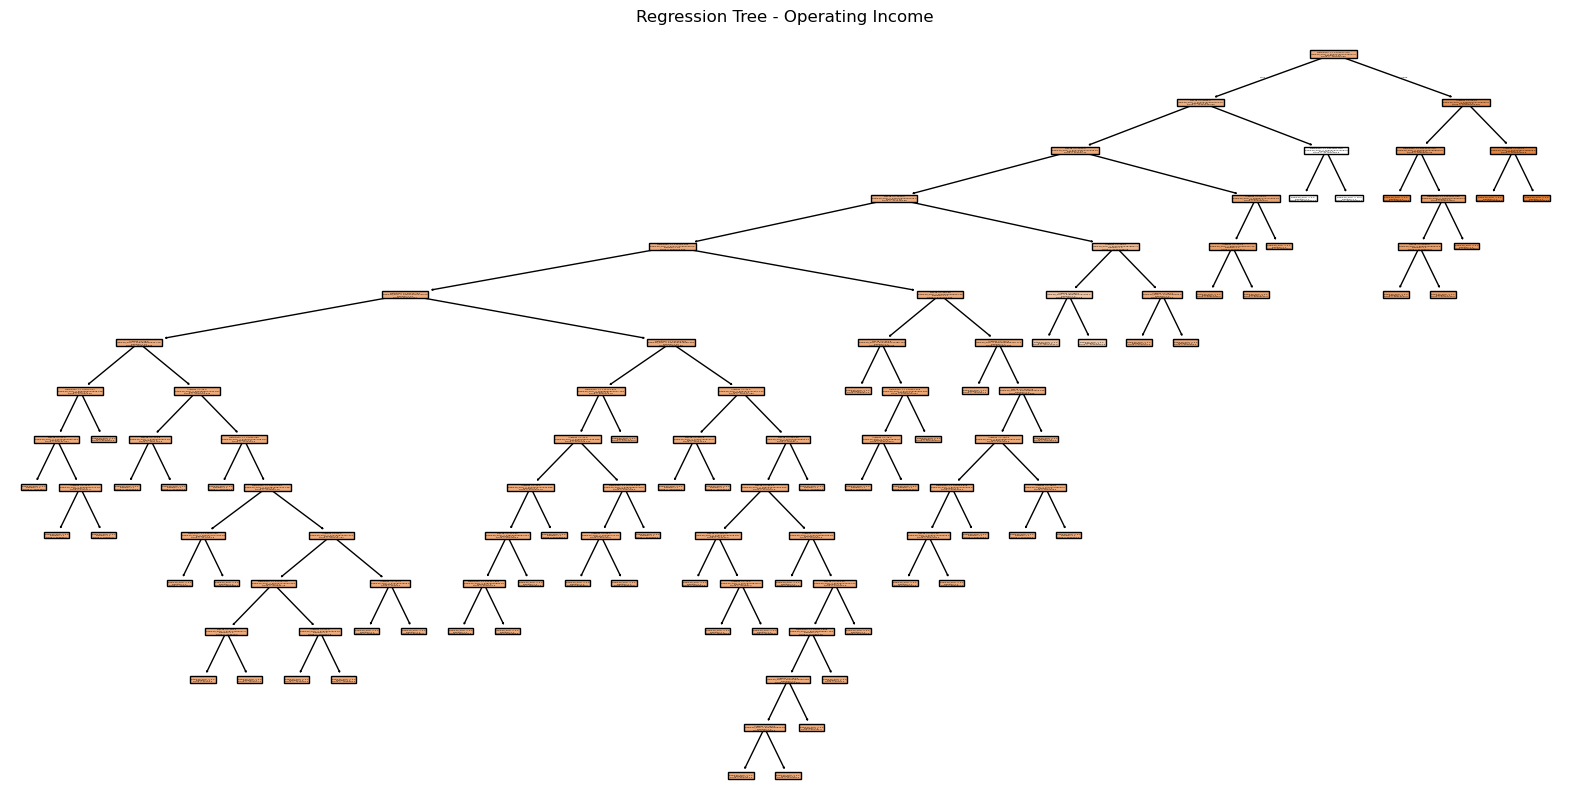

In [11]:
x_income = hospital_data[['NoFTE', 'NetPatRev', 'AvlBeds']]
y_income = hospital_data['OperInc']

reg_tree_income = DecisionTreeRegressor(random_state=42)
reg_tree_income.fit(x_income, y_income)

plt.figure(figsize=(20,10))
plot_tree(reg_tree_income, feature_names = x_income.columns, filled = True)
plt.title('Regression Tree - Operating Income') 
plt.show()

This tree used NoFTE, NetPatRev, and AvlBeds as predictors. The first and most important split is on NetPatRev, which makes sense—more patient revenue usually means more income. The next splits on staff and beds show that bigger hospitals with more resources tend to earn more. Overall, the tree matches what we'd expect about how hospital size and revenue affect income.

### Regression Tree - `Operating Revenue`

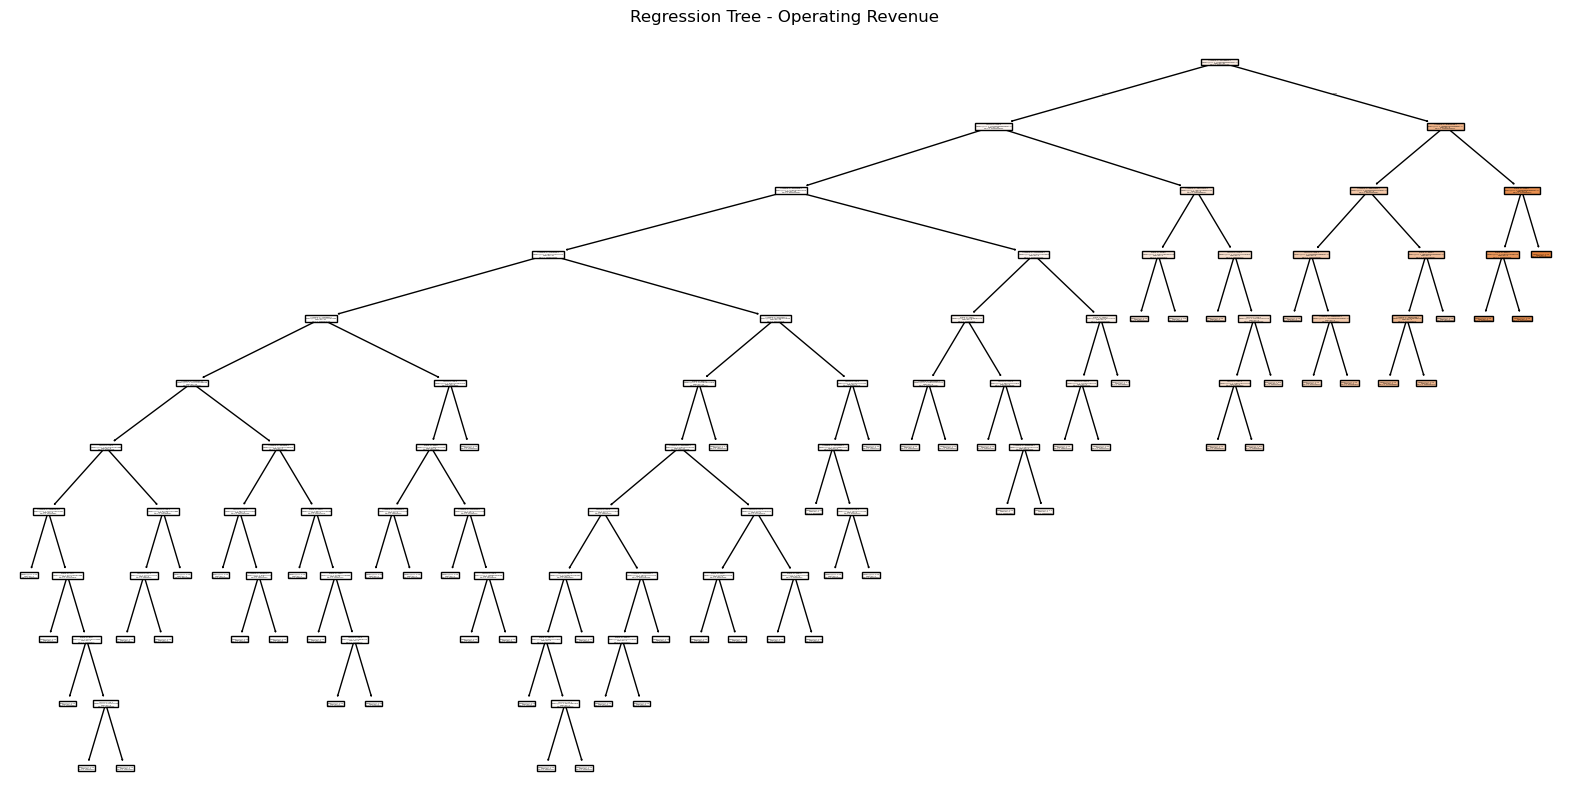

In [33]:
x_revenue = hospital_data[['NoFTE', 'InOperExp', 'AvlBeds']]
y_revenue = hospital_data['OperRev']

reg_tree_revenue = DecisionTreeRegressor(random_state=42)
reg_tree_revenue.fit(x_revenue, y_revenue)

plt.figure(figsize=(20,10))
plot_tree(reg_tree_revenue, feature_names = x_revenue.columns, filled = True)
plt.title('Regression Tree - Operating Revenue') 
plt.show()

This tree predicts hospital revenue using the number of staff (NoFTE), inpatient expenses (InOperExp), and available beds (AvlBeds). The first and most important split is on InOperExp, which makes sense—hospitals that spend more on inpatient operations typically generate more revenue. Further splits on staff size and bed capacity show that larger hospitals with more resources tend to bring in higher revenue. Overall, the tree reflects expected financial patterns: bigger, busier hospitals with higher expenses usually earn more.

### Classification tree - `Type Control`

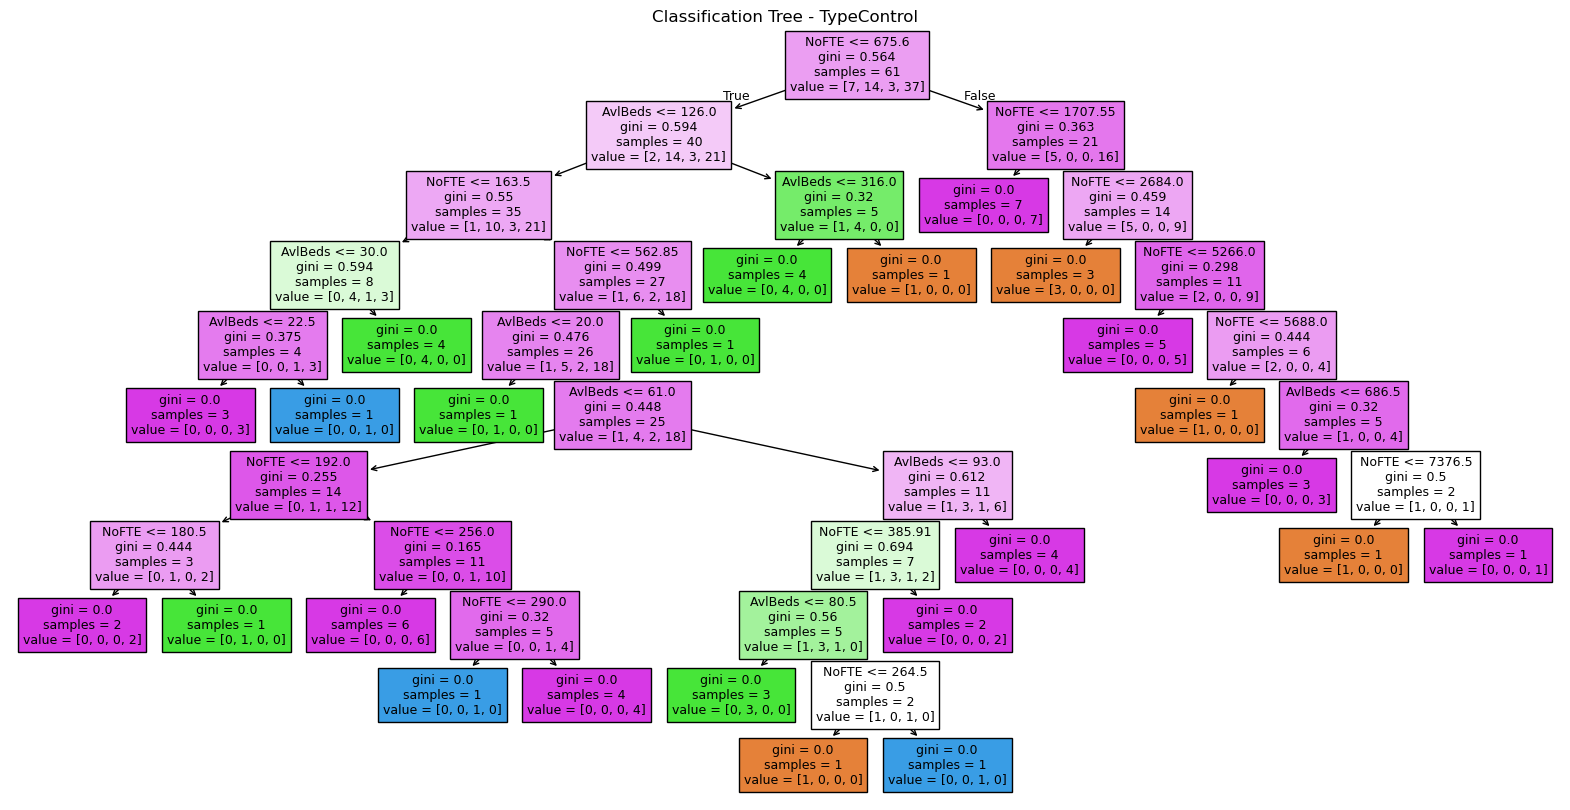

In [16]:
x_typecontrol = hospital_data[['NoFTE', 'AvlBeds', 'DonorType']]
x_typecontrol = pd.get_dummies(x_typecontrol)

y_typecontrol = hospital_data['TypeControl']

clf_tree_typecontrol = DecisionTreeClassifier(random_state=42)
clf_tree_typecontrol.fit(x_typecontrol, y_typecontrol)

# Plot
plt.figure(figsize=(20,10))
plot_tree(clf_tree_typecontrol, feature_names = x_typecontrol.columns, filled = True)
plt.title('Classification Tree - TypeControl')
plt.show()

This tree predicts the hospital’s control type (like government or non-profit) using staff size (NoFTE), beds (AvlBeds), and donation-related data. It shows clear patterns—government hospitals often have more staff and beds, while religious or private hospitals show different donation trends. The splits reflect real differences in how different types of hospitals operate and are funded.

### Classification tree - `Donor Type`

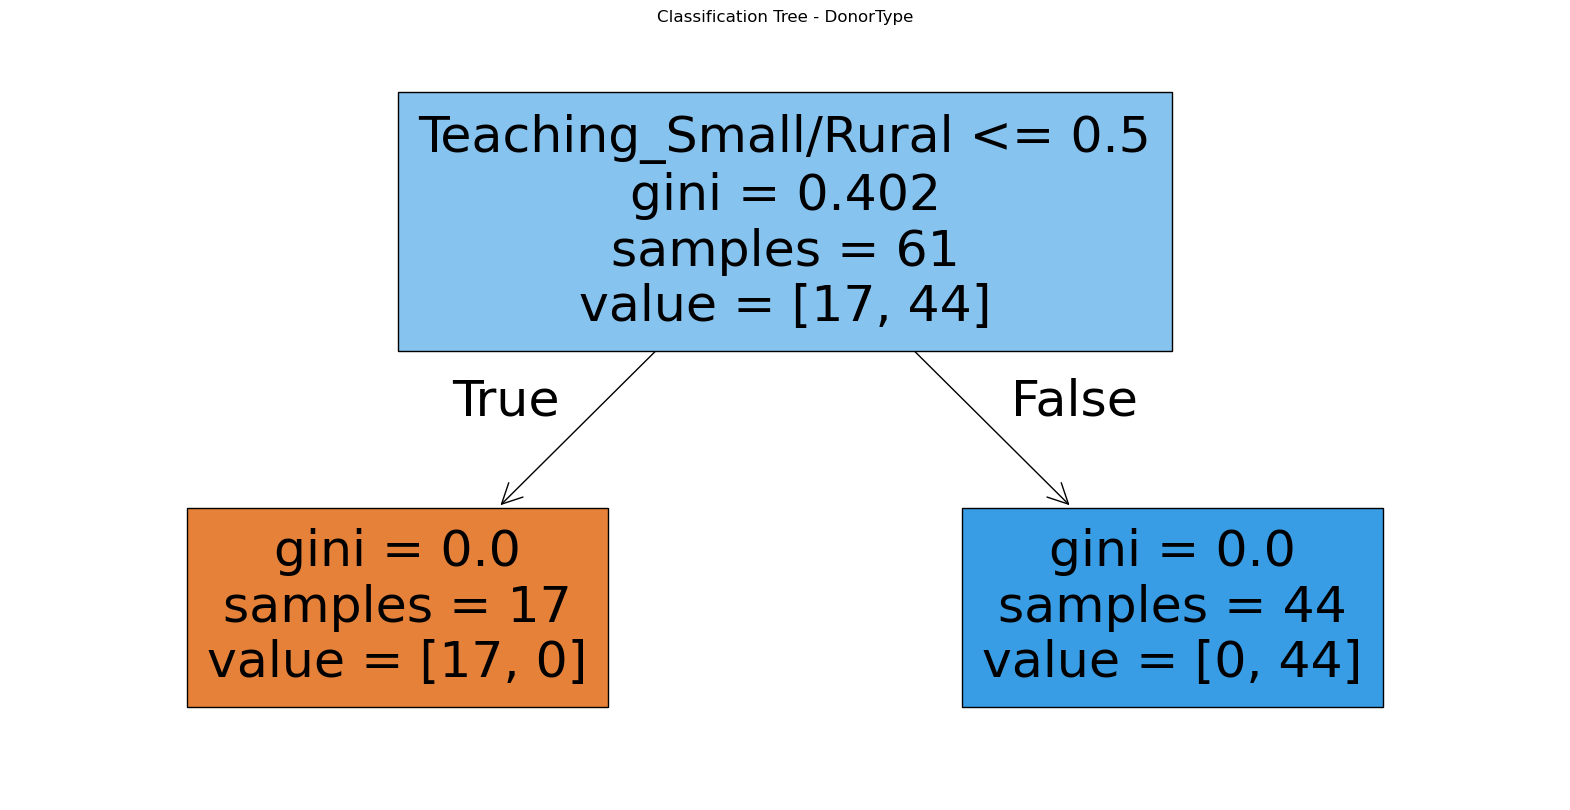

In [18]:
x_donortype = hospital_data[['NoFTE', 'InOperExp', 'Teaching']]
x_donortype = pd.get_dummies(x_donortype)

y_donortype = hospital_data['DonorType']

clf_tree_donortype = DecisionTreeClassifier(random_state=42)
clf_tree_donortype.fit(x_donortype, y_donortype)

plt.figure(figsize=(20,10))
plot_tree(clf_tree_donortype, feature_names = x_donortype.columns, filled = True)
plt.title('Classification Tree - DonorType')
plt.show()

This model predicts the type of donors a hospital has, based on whether it’s a teaching hospital, its expenses (InOperExp), and staff size. The first split is on teaching status, which makes sense—teaching hospitals might attract more public or academic donations. Further splits show that expenses and staff size also help explain donor types. The tree highlights how a hospital’s mission and structure affect who donates to it.

**Best Model?**  
I would choose the regression tree for Operating Revenue as the best model. It uses logical, easy-to-interpret predictors—staff size, inpatient expenses, and available beds—that reflect real-world drivers of revenue.